            time      flux
734  1807.305270  0.997657
735  1807.326103  0.990706
736  1807.346936  0.977732
737  1807.367769  0.963388
738  1807.388602  0.949902
739  1807.409434  0.938400
740  1807.430267  0.930436
741  1807.451100  0.927563
742  1807.471933  0.932034
743  1807.492766  0.941571
744  1807.513599  0.953895
745  1807.534432  0.967864
746  1807.555265  0.981956
747  1807.576098  0.992547
748  1807.596931  0.999384
            time      flux
742  1807.471933  0.932034
743  1807.492766  0.941571
744  1807.513599  0.953895
745  1807.534432  0.967864
746  1807.555265  0.981956
747  1807.576098  0.992547
748  1807.596931  0.999384
            time      flux
734  1807.305270  0.997657
735  1807.326103  0.990706
736  1807.346936  0.977732
737  1807.367769  0.963388
738  1807.388602  0.949902
739  1807.409434  0.938400
740  1807.430267  0.930436


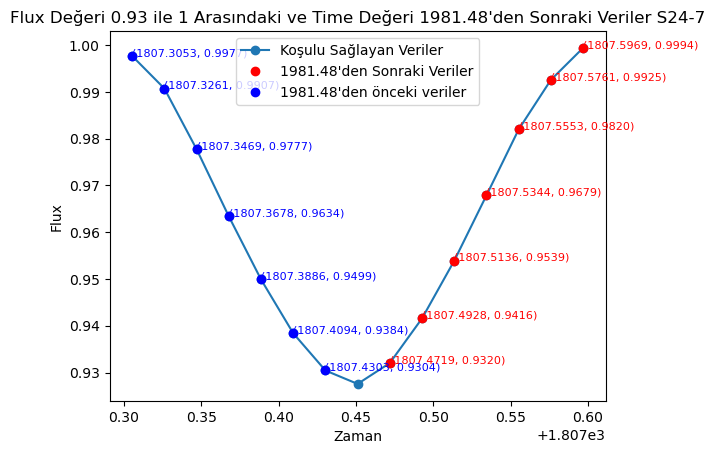

            time      flux
740  1807.430267  0.930436
739  1807.409434  0.938400
738  1807.388602  0.949902
737  1807.367769  0.963388
736  1807.346936  0.977732
735  1807.326103  0.990706
734  1807.305270  0.997657
             0         1            0         1
0  1807.471933  0.932034  1807.430267  0.930436
1  1807.492766  0.941571  1807.409434  0.938400
2  1807.513599  0.953895  1807.388602  0.949902
3  1807.534432  0.967864  1807.367769  0.963388
4  1807.555265  0.981956  1807.346936  0.977732
5  1807.576098  0.992547  1807.326103  0.990706
6  1807.596931  0.999384  1807.305270  0.997657
           0         1
0  1807.4511  0.931235
1  1807.4511  0.939986
2  1807.4511  0.951899
3  1807.4511  0.965626
4  1807.4511  0.979844
5  1807.4511  0.991626
6  1807.4511  0.998520


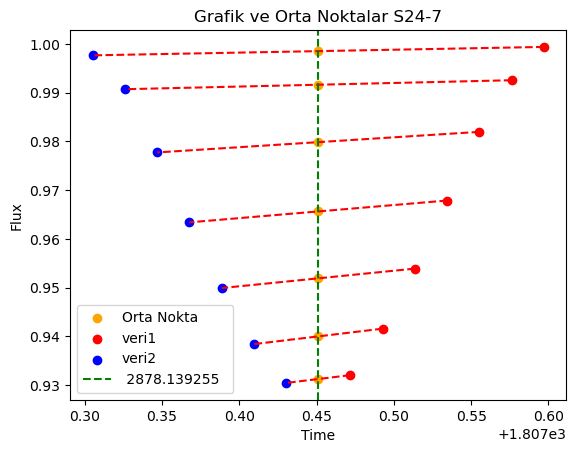

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Veriyi oku
veri = pd.read_csv(".//S18_not.csv")

# Koşulu kontrol et
if (veri['flux'].between(0.93, 1, inclusive='both')).any() and ((veri['time'] > 1807.3) & (veri['time'] < 1807.6)).any():
    # Koşulu sağlayan verileri seçin
    S17 = veri[(veri['flux'].between(0.85, 1, inclusive='both')) & ((veri['time'] > 1807.3) & (veri['time'] < 1807.6))]
    print(S17)
    
    # Time değeri 1807.46'den büyük olan verileri seçin
    sagindaki_veriler = S17[S17['time'] > 1807.46]
    print(sagindaki_veriler)
    solundaki_veriler = S17[S17['time'] <1807.44]
    print(solundaki_veriler)

    # Seçilen verilerin grafiğini çizin
    plt.plot(S17['time'], S17['flux'], marker='o', label='Koşulu Sağlayan Veriler')
    plt.plot(sagindaki_veriler['time'], sagindaki_veriler['flux'], marker='o', linestyle='None', color='red', label='1981.48\'den Sonraki Veriler')
    plt.plot(solundaki_veriler['time'], solundaki_veriler['flux'], marker='o', linestyle='None', color='blue', label='1981.48\'den önceki veriler')

    # Noktaların yanına değerleri yazdır
    for index, row in sagindaki_veriler.iterrows():
        plt.text(row['time'], row['flux'], f"({row['time']:.4f}, {row['flux']:.4f})", color='red', fontsize=8, ha='left')
    for index, row in solundaki_veriler.iterrows():
        plt.text(row['time'], row['flux'], f"({row['time']:.4f}, {row['flux']:.4f})", color='blue', fontsize=8, ha='left')

    plt.title('Flux Değeri 0.93 ile 1 Arasındaki ve Time Değeri 1981.48\'den Sonraki Veriler S24-7')
    plt.xlabel('Zaman')
    plt.ylabel('Flux')
    plt.legend()
    plt.show()


# Veri setini oluştur
veri_seti =solundaki_veriler

# Pandas DataFrame oluştur
veri = pd.DataFrame(veri_seti)

# Zaman ve akış değerlerini ters çevir
veri_ters_cevirilmis = veri.iloc[::-1]


# Sonuçları göster
print(veri_ters_cevirilmis)

veri_seti1 = (sagindaki_veriler)

veri_seti2 = (veri_ters_cevirilmis)

# DataFrame'leri oluştur
veri1 = pd.DataFrame(veri_seti1.values)
veri2 = pd.DataFrame(veri_seti2.values)

# İki DataFrame'i yan yana birleştir
yan_yana_birlesik_veri = pd.concat([veri1, veri2], axis=1)

# Sonuçları göster
print(yan_yana_birlesik_veri)
# Her iki veri setindeki her satırdaki iki noktanın orta noktasını hesapla
orta_noktalar = pd.DataFrame((veri1 + veri2) / 2)

# Sonuçları göster
print(orta_noktalar)


# Orta noktaları çiz
plt.scatter(orta_noktalar[0], orta_noktalar[1], c='orange', marker='o', label='Orta Nokta')

plt.scatter(veri1[0], veri1[1], c='red', marker='o', label='veri1')
plt.scatter(veri2[0], veri2[1], c='blue', marker='o', label='veri2')

# Yan yana birleştirilmiş veri setini tanımla
araliklar = yan_yana_birlesik_veri.values

secilen_veriler = []


# Her aralıktaki doğru denklemlerini çiz
for aralik in araliklar:
    x1, y1, x2, y2 = aralik
    plt.plot([x1, x2], [y1, y2], color='red', linestyle='--')
plt.axvline(x=  1807.4511 , color='green', linestyle='--', label=' 2878.139255  ')

# Grafik özellikleri
plt.title('Grafik ve Orta Noktalar S24-7')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend()
plt.show()